# Task 1:Weather Data analysis

#### Description: 

#### Weather Data Analysis involves examining historical weather data to extract insights and patterns. This could include analyzing temperature trends, precipitation patterns, wind speeds, and more.

In [1]:
#Importing required libraries:


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
df=pd.read_csv(r"C:\Users\ANAND\Downloads\Alfido Tech\Weather Data.csv")

In [3]:
df.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

# 1.Data Exploration:

### Shape of dataset

In [4]:
df.shape

(8784, 8)

### Columns names

In [5]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

### All information about Dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


### Statistical information about all numerical columns

In [7]:
df.describe()

Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000

# Data Cleaning

### Checking for Duplicates

In [8]:
df.duplicated().sum()

0

### Noise Values

In [9]:
for i in df:
    print(i,df[i].sort_values().unique(),'\n')

Date/Time ['1/1/2012 0:00' '1/1/2012 10:00' '1/1/2012 11:00' ... '9/9/2012 7:00'
 '9/9/2012 8:00' '9/9/2012 9:00'] 

Temp_C [-23.3 -23.2 -22.8 -22.2 -21.4 -21.3 -21.2 -21.1 -21.  -20.7 -20.6 -20.3
 -20.  -19.9 -19.6 -19.5 -19.3 -19.2 -19.1 -19.  -18.7 -18.6 -18.5 -18.4
 -18.3 -18.2 -18.1 -18.  -17.9 -17.8 -17.7 -17.6 -17.5 -17.4 -17.3 -17.2
 -17.1 -17.  -16.9 -16.8 -16.7 -16.6 -16.4 -16.3 -16.2 -16.1 -16.  -15.9
 -15.8 -15.7 -15.5 -15.4 -15.3 -15.2 -15.1 -15.  -14.9 -14.8 -14.7 -14.6
 -14.5 -14.4 -14.3 -14.2 -14.  -13.9 -13.8 -13.7 -13.6 -13.5 -13.4 -13.3
 -13.2 -13.1 -13.  -12.9 -12.8 -12.7 -12.6 -12.5 -12.4 -12.3 -12.2 -12.1
 -12.  -11.9 -11.8 -11.7 -11.6 -11.5 -11.4 -11.3 -11.2 -11.1 -11.  -10.9
 -10.8 -10.7 -10.6 -10.5 -10.4 -10.3 -10.2 -10.1 -10.   -9.9  -9.8  -9.7
  -9.6  -9.5  -9.4  -9.3  -9.2  -9.1  -9.   -8.9  -8.8  -8.7  -8.6  -8.5
  -8.4  -8.3  -8.2  -8.1  -8.   -7.9  -7.8  -7.7  -7.6  -7.5  -7.4  -7.3
  -7.2  -7.1  -7.   -6.9  -6.8  -6.7  -6.6  -6.5  -6.4  -6.3  -6.2  -6.1


### Null Values

In [10]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

### Datatype of each Columns


In [11]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

### Split Date/Time into Date and Time

In [12]:
df[['Date','Time']] = df['Date/Time'].str.split(' ',expand=True)

###  Convert Date column to Date

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Convert Date column to Date
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Date/Time                   object
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
Date                datetime64[ns]
Time                        object
dtype: object

# Data Visualization:

### 1.Correlation Between Numerical Values:

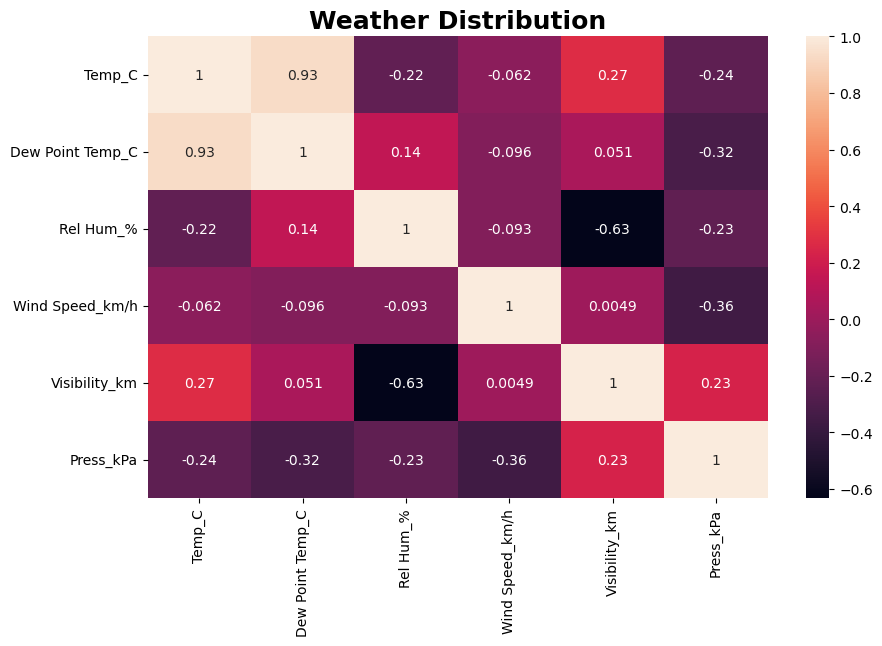

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Weather Distribution',color='Black',fontweight='bold',fontsize=18)
plt.show()

### 2.Getting seasons:

In [17]:

def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].apply(get_season)

### Rearrange columns

In [18]:

df = df[['Date', 'Month', 'Time', 'Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km' ,'Press_kPa', 'Weather', 'Season']]
df = df.reset_index()

### 3.Temperature Distribution:

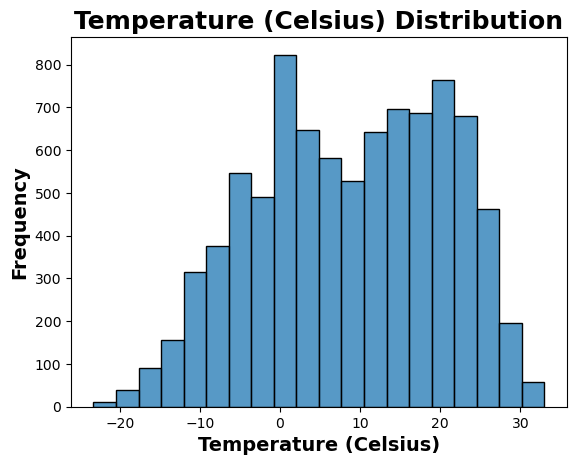

In [19]:
sns.histplot(df['Temp_C'], bins=20)
plt.title('Temperature (Celsius) Distribution',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Temperature (Celsius)',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Frequency',color='Black',fontweight='bold',fontsize=14)
plt.show()

### 4.Weather Distribuation Analysis:

In [20]:
weather_counts=  df['Weather'].value_counts().sort_values(ascending =False).head(15)
weather_counts

Mainly Clear         2106
Mostly Cloudy        2069
Cloudy               1728
Clear                1326
Snow                  390
Rain                  306
Rain Showers          188
Fog                   150
Rain,Fog              116
Drizzle,Fog            80
Snow Showers           60
Drizzle                41
Snow,Fog               37
Snow,Blowing Snow      19
Rain,Snow              18
Name: Weather, dtype: int64

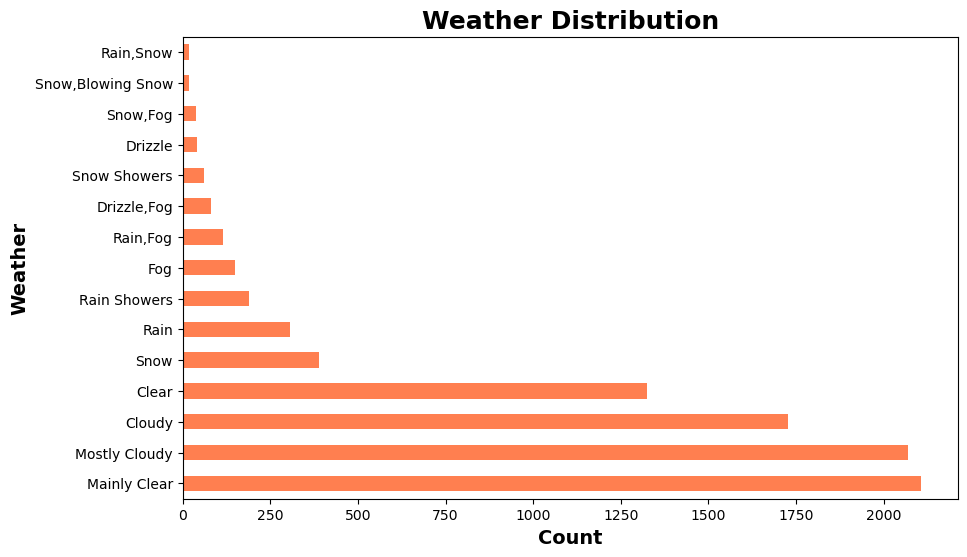

In [21]:
plt.figure(figsize=(10,6))
weather_counts.plot(kind='barh',color='coral')
plt.xlabel('Count',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Weather',color='Black',fontweight='bold',fontsize=14)
plt.title('Weather Distribution',color='Black',fontweight='bold',fontsize=18)
plt.show()

### 5.Humidity Distribution:

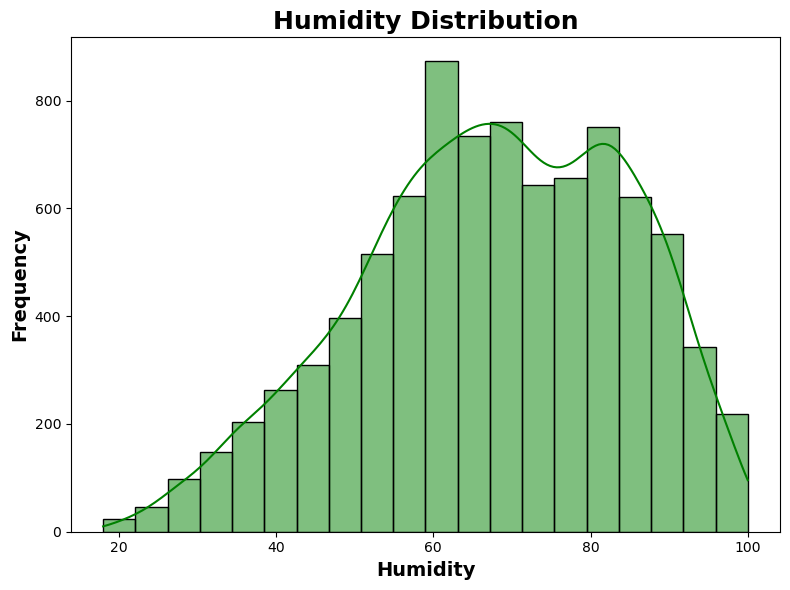

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rel Hum_%'], bins=20, color='green', kde=True)
plt.xlabel('Humidity',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Frequency',color='Black',fontweight='bold',fontsize=14)
plt.title('Humidity Distribution',color='Black',fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

### 6.Wind Speed Distribution:

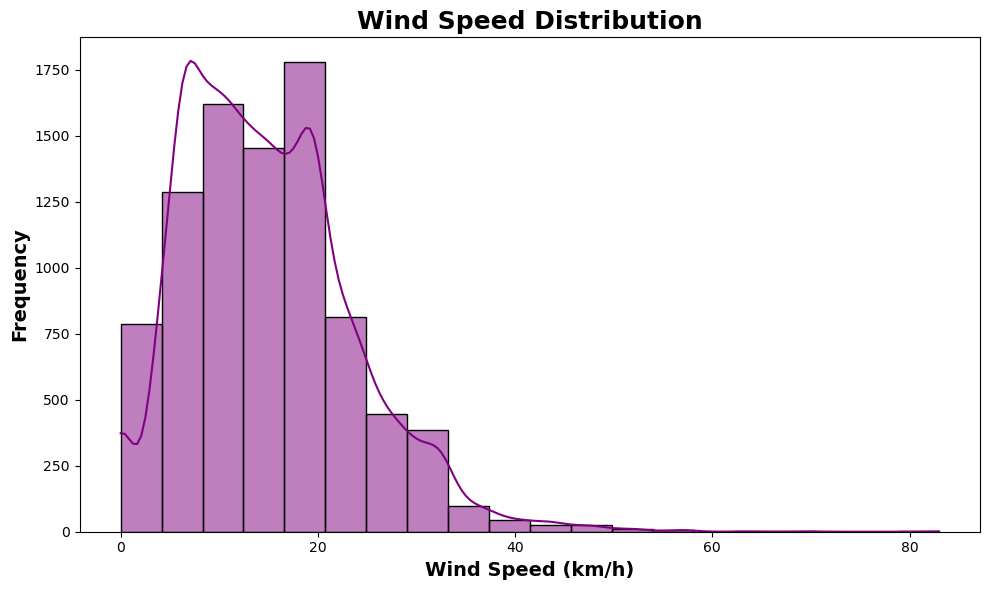

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df['Wind Speed_km/h'],bins=20 ,color='purple',kde=True)
plt.xlabel('Wind Speed (km/h)',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Frequency',color='Black',fontweight='bold',fontsize=14)
plt.title('Wind Speed Distribution',color='Black',fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

 The histogram of wind speeds provides an overview of the frequency of different wind speeds. It shows the most of the time the wind speed is nearer to 20km/h.

####  Extract and create new columns for Year, Month, Day, and Hour

In [24]:
df['Year'] = df['Date'].dt.year

In [25]:
df['Time']=pd.to_datetime(df['Time'])

df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour


### 7.Average Temperature Over Months:

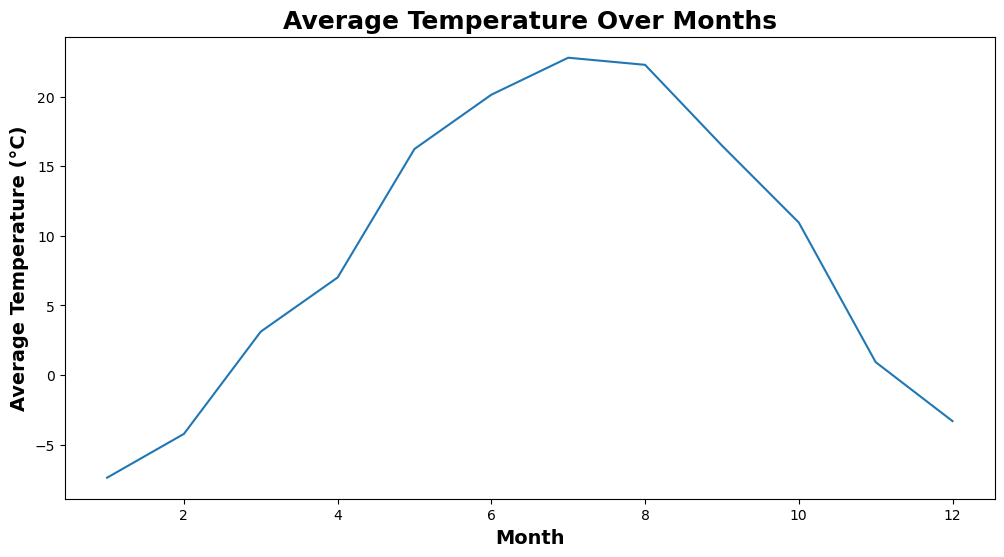

In [26]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Temp_C', data=df.groupby('Month')['Temp_C'].mean().reset_index())
plt.title('Average Temperature Over Months',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Month',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Average Temperature (°C)',color='Black',fontweight='bold',fontsize=14)
plt.show()

This plot can provide insights into the seasonal variations in temperature.It shows higher temperatures in summer months and lower temperatures in winter months.

### 8.Wind Speed Over Time:

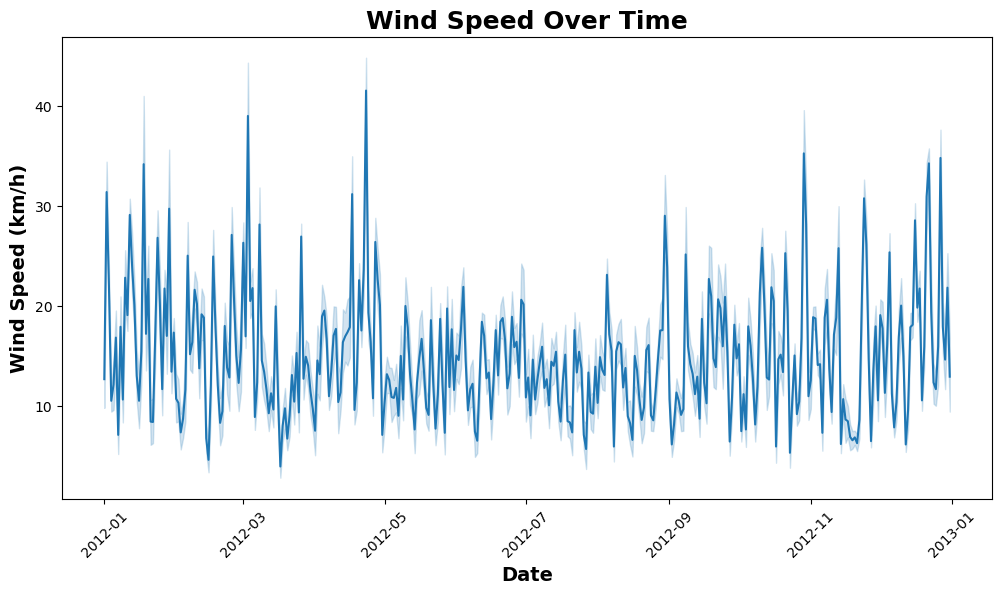

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Wind Speed_km/h', data=df)
plt.title('Wind Speed Over Time',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Date',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Wind Speed (km/h)',color='Black',fontweight='bold',fontsize=14)
plt.xticks(rotation=45)
plt.show()

The line plot of wind speed over time can reveal trends or patterns in wind behavior. Sudden spikes in wind speed indicate storms or turbulent weather periods.

### 8.Temperature vs. Dew Point Temperature:

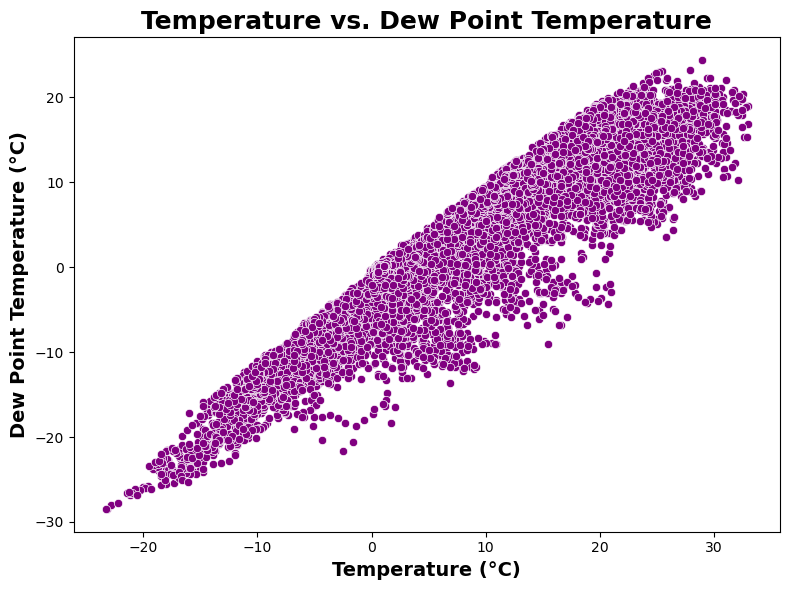

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=df, color='purple')
plt.xlabel('Temperature (°C)',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Dew Point Temperature (°C)',color='Black',fontweight='bold',fontsize=14)
plt.title('Temperature vs. Dew Point Temperature',color='Black',fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()


### 9.Wind Speed vs. Visibility

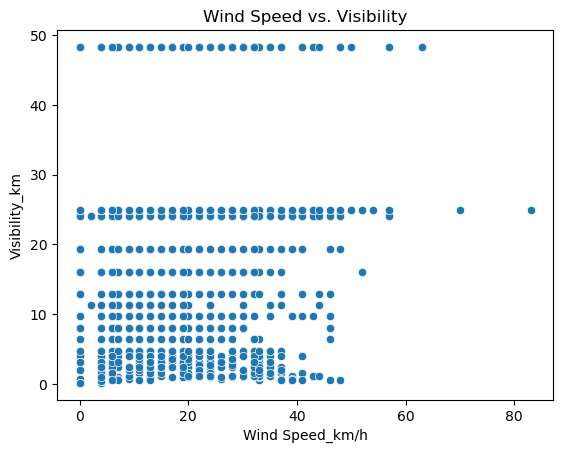

In [29]:
sns.scatterplot(x='Wind Speed_km/h', y='Visibility_km', data=df)
plt.title('Wind Speed vs. Visibility')
plt.show()

### 10.Sunburst Chart of Weather Categories

In [30]:
import plotly.express as px

weather_counts = df['Weather'].value_counts()

fig = px.sunburst(
    data_frame=weather_counts.reset_index(),
    path=['index'],
    values='Weather',
    color='Weather',
    color_continuous_scale='viridis',
    title='Sunburst Chart of Weather Categories'
)
fig.show()

### 11.Temperature in Different Seasons:

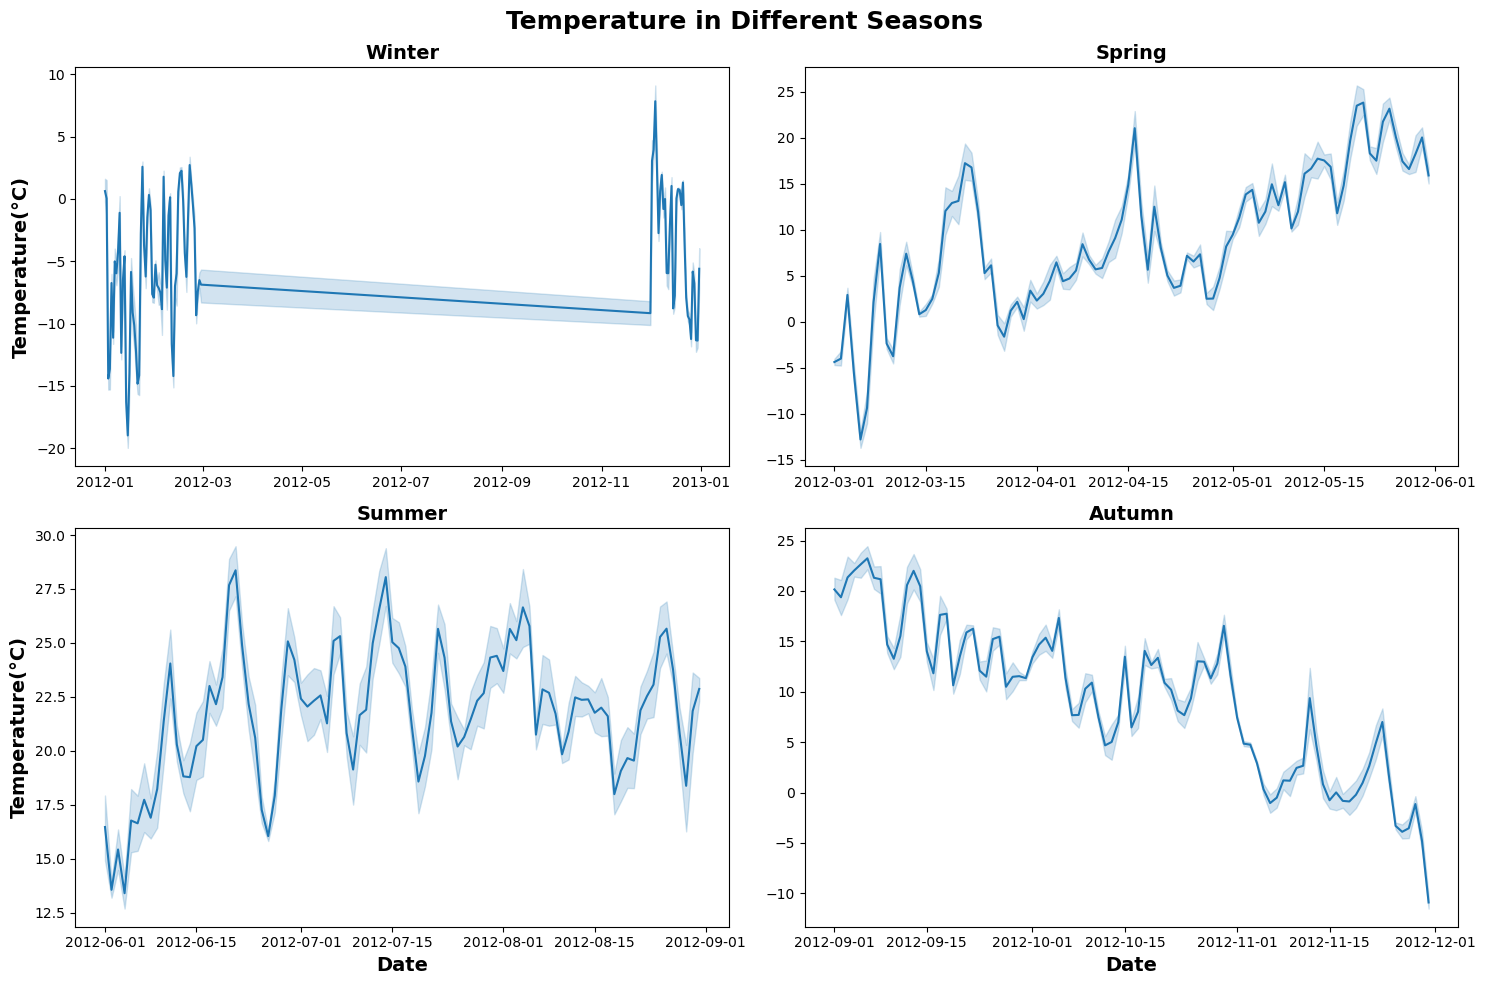

In [41]:
seasons = df['Season'].unique()

fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, season in enumerate(seasons):
    df_season = df[df['Season'] == season]
    sns.lineplot(x ='Date', y = "Temp_C", data= df_season, ax=axs[i])
    axs[i].set_title(f'{season}',color='Black',fontweight='bold',fontsize=14)
    axs[i].set_ylabel('Temperature (°C)',color='Black',fontweight='bold',fontsize=14)
    axs[i].set_xlabel('Date',color='Black',fontweight='bold',fontsize=14)
    axs[i].set_ylabel('Temperature(°C)',color='Black',fontweight='bold',fontsize=14)

    # Remove y-label from 2nd and 4th subplots
    if i == 1 or i == 3:
        axs[i].set_ylabel('')

    if i < 2:
        # Remove x label and x-ticks
        axs[i].set_xlabel('')

plt.suptitle('Temperature in Different Seasons',color='Black',fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()


### 12.Wind Speed in Different Weathers:

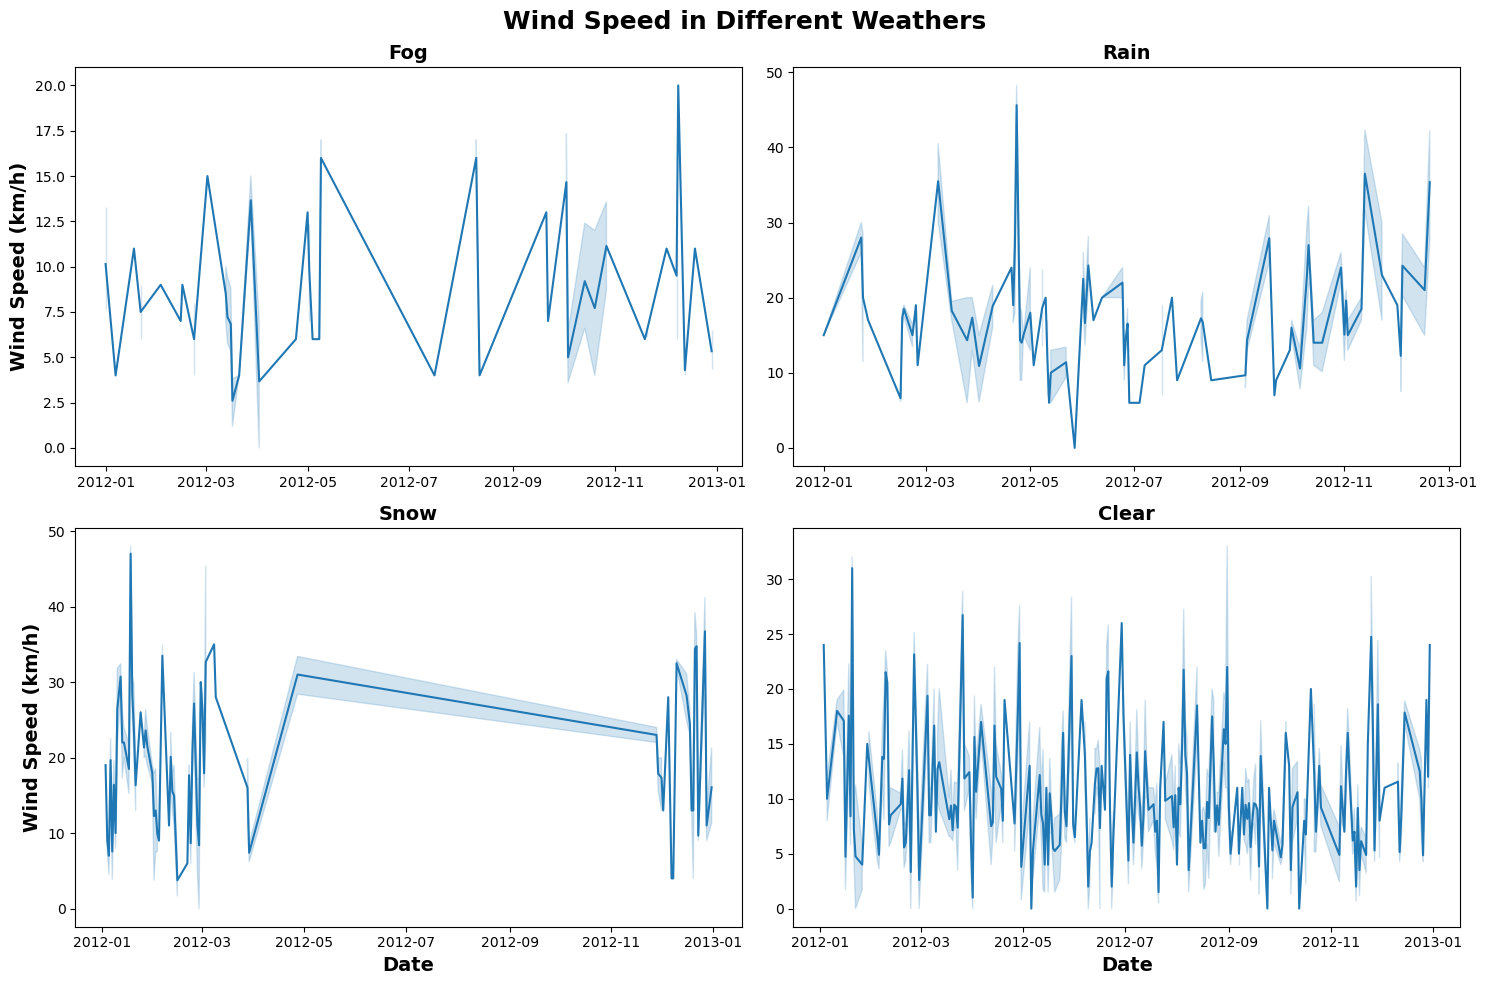

In [46]:
weather_df = df[df['Weather'].isin(['Clear', 'Snow', 'Rain', 'Fog'])]
weather_conditions = weather_df['Weather'].unique()
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, weather in enumerate(weather_conditions):
    df_weather = weather_df[weather_df['Weather'] == weather]
    sns.lineplot(x ='Date', y = "Wind Speed_km/h", data= df_weather, ax=axs[i])
    axs[i].set_title(f'{weather}',color='Black',fontweight='bold',fontsize=14)
    axs[i].set_ylabel('Wind Speed (km/h)',color='Black',fontweight='bold',fontsize=14)
    axs[i].set_xlabel('Date',color='Black',fontweight='bold',fontsize=14)

    # Remove y-label from 2nd and 4th subplots
    if i == 1 or i == 3:
        axs[i].set_ylabel('')

    if i < 2:
        # Remove x label and x-ticks
        axs[i].set_xlabel('')

plt.suptitle('Wind Speed in Different Weathers',color='Black',fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()


# *THANKS*